In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('data_preprocessed.csv')
df

,customer_id,age,gender_cd,region_size,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,child_amt,...,employee_id,emp_age,emp_gender_cd,emp_children_cnt,emp_work_months_cnt,emp_citizenship_country_cd,emp_marital_status_cd,day_of_week,is_holiday,region_size_numeric
0,422206773,58.0,0,No,NaN,NaN,NaN,NaN,NaN,NaN,...,142052.0,30,W,NaN,1,NaN,NaN,1,0,0
1,348648289,44.0,1,rural,0.0,0.0,0.0,0.0,1.0,1.0,...,7004.0,36,W,NaN,2,RUS,NaN,2,0,4
2,345496995,23.0,0,town,0.0,0.0,1.0,0.0,1.0,0.0,...,80760.0,52,W,NaN,6,NaN,NaN,4,0,1
3,182783192,34.0,1,town,0.0,0.0,0.0,0.0,0.0,0.0,...,158672.0,22,NaN,NaN,8,NaN,NaN,4,0,1
4,138498254,30.0,1,No,NaN,NaN,NaN,NaN,NaN,NaN,...,14462.0,51,W,NaN,7,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16374,189614349,35.0,0,No,NaN,NaN,NaN,NaN,NaN,NaN,...,223598.0,56,W,NaN,7,RUS,UNM,6,1,0
16375,305526568,58.0,0,msk,0.0,0.0,0.0,0.0,0.0,0.0,...,265923.0,53,W,NaN,6,NaN,NaN,4,0,3
16376,77876991,47.0,1,urban,0.0,1.0,1.0,1.0,1.0,1.0,...,215719.0,29,M,NaN,4,NaN,NaN,4,0,2
16377,321508947,41.0,1,town,0.0,0.0,1.0,0.0,1.0,1.0,...,97765.0,39,W,NaN,0,NaN,NaN,3,0,1


In [12]:
# Добаление признака-флага успеха(1) и отказа(0)
df['flag_call_result'] = df['wo_hit_status_result_desc'].apply(lambda x: 1 if 'Успешно' in x else 0)

In [13]:
conditions = [
    (df['age'] >= 18) & (df['age'] <= 29),  
    (df['age'] >= 30) & (df['age'] <= 42), 
    (df['age'] > 42) & (df['age'] <= 60)
]

# Определение значений для категорий
values = [0, 1, 2]

# Создание нового столбца 'Возрастная категория'
df['age_cat'] = pd.cut(df['age'], bins=[17, 29, 42, 60], labels=['18-29', '30-42', '42-60'], right=True)

C:\Users\valer\AppData\Local\Temp\ipykernel_17060\471439450.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['age_cat', 'flag_call_result']).size().unstack(fill_value=0)


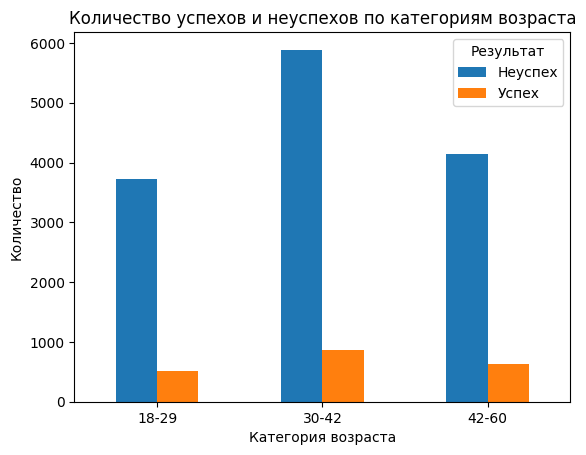

In [14]:
grouped = df.groupby(['age_cat', 'flag_call_result']).size().unstack(fill_value=0)

grouped.columns = ['Неуспех', 'Успех']

grouped.plot(kind='bar', stacked=False)


plt.title('Количество успехов и неуспехов по категориям возраста')
plt.xlabel('Категория возраста')
plt.ylabel('Количество')
plt.xticks(rotation=0)

plt.legend(title='Результат', labels=['Неуспех', 'Успех'])
plt.show()

In [27]:
translations = {
    "Preapprove": "предодобренные заявки",
    "Cold": "холодная продажа",
    "Afterfilling": "дозаполнение заявки",
    "Utilization": "утилизация",
    "Agreement": "согласие",
    "Meeting": "встреча",
    "Upsell": "продажа более дорого и тяжёлого продукта",
    "Reutilization": "повторная утилизация",
    "Incoming": "входящий звонок",
    "Downsell": "продажа более дешёвого и легкого продукта",
    "Activation": "активация продукта",
    "Personal accident Insurance": "личное страхование от несчастных случаев",
    "Verification": "верификация каких-либо данных",
    "Autoleads": "автоследование",
    "BAF": "«Приведи друга»",
    "Prolongation": "пролонгация (продление договора)",
    "Deposit": "депозит",
    "Refinancing": "рефинансирование"
}

C:\Users\valer\AppData\Local\Temp\ipykernel_17060\3671601551.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['age_cat', 'functional_cd', 'flag_call_result']).size().unstack(fill_value=0)


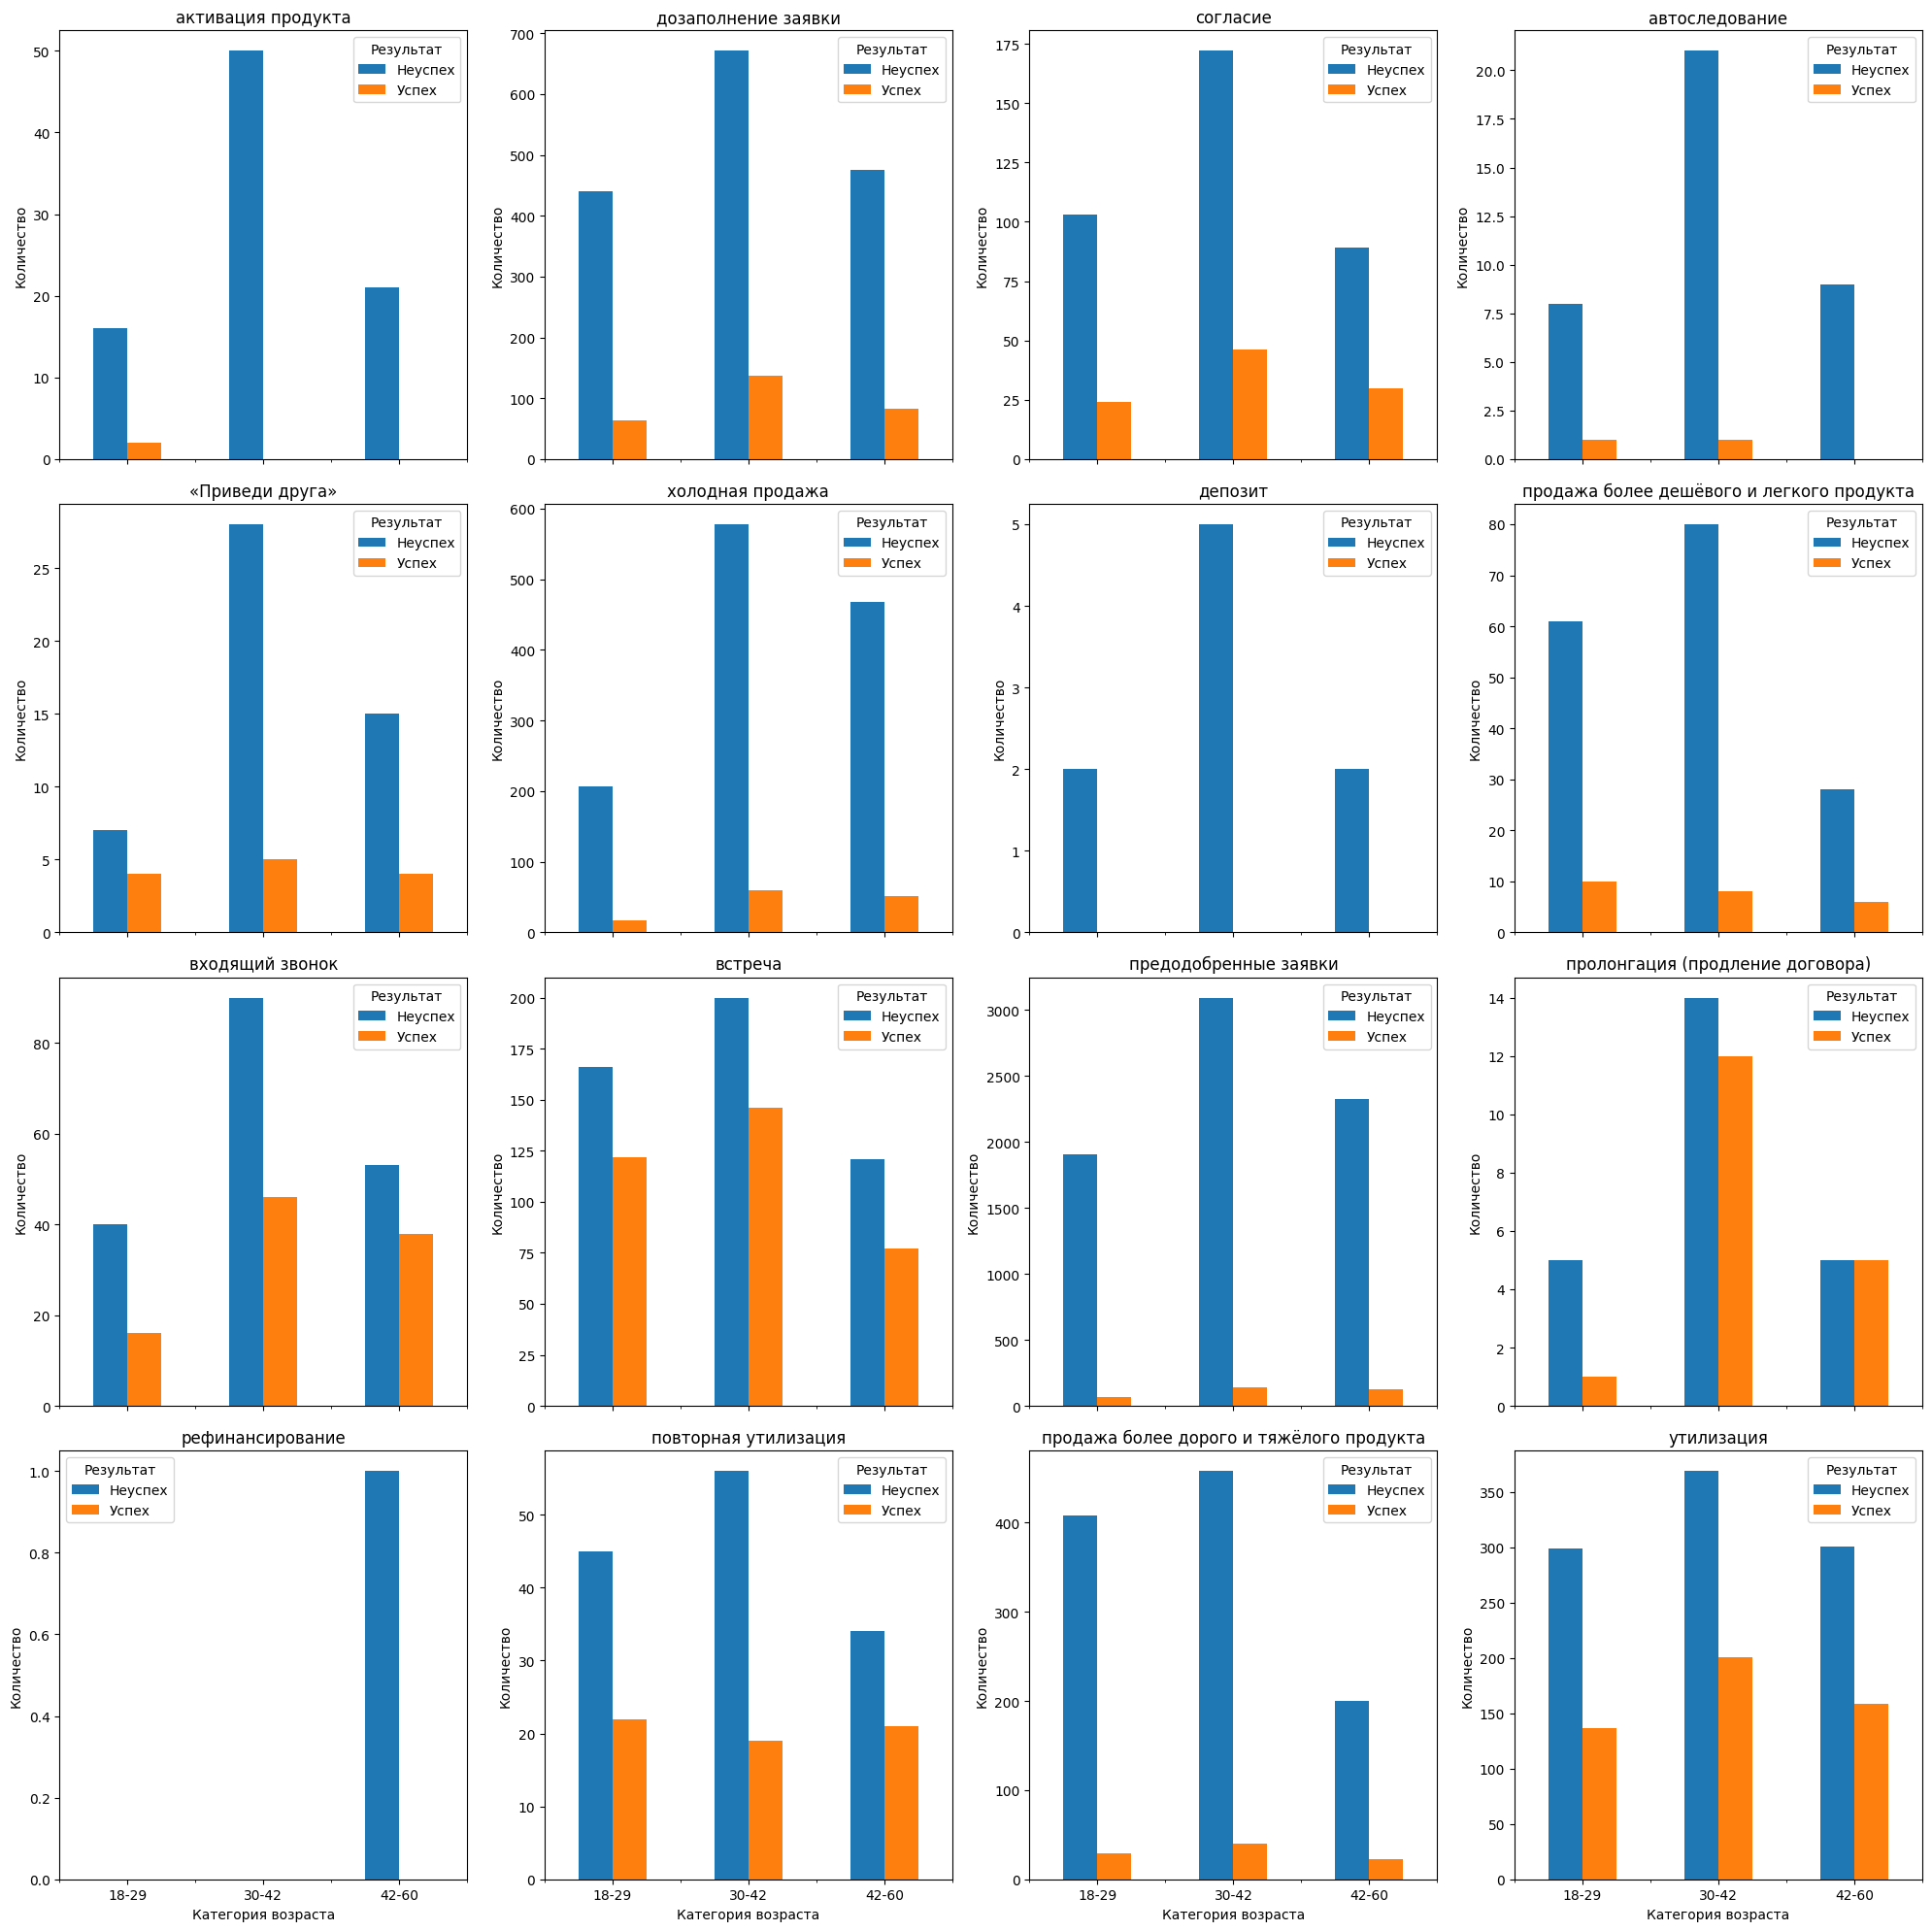

In [28]:
grouped = df.groupby(['age_cat', 'functional_cd', 'flag_call_result']).size().unstack(fill_value=0)

grouped.columns = ['Неуспех', 'Успех']

num_graphs = len(grouped.index.levels[1])
ncols = 4
nrows = (num_graphs + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows * 5), sharex=True)

axes = axes.flatten()

for i, functional_cd in enumerate(grouped.index.levels[1]):
    ax = axes[i]
    data_to_plot = grouped.xs(functional_cd, level='functional_cd')
    data_to_plot.plot(kind='bar', ax=ax)
    ax.set_title(translations[functional_cd])
    ax.set_ylabel('Количество')
    ax.set_xlabel('Категория возраста')
    ax.legend(title='Результат', labels=['Неуспех', 'Успех'])
    ax.set_xticks(range(len(data_to_plot)))
    ax.set_xticklabels(data_to_plot.index, rotation=0)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


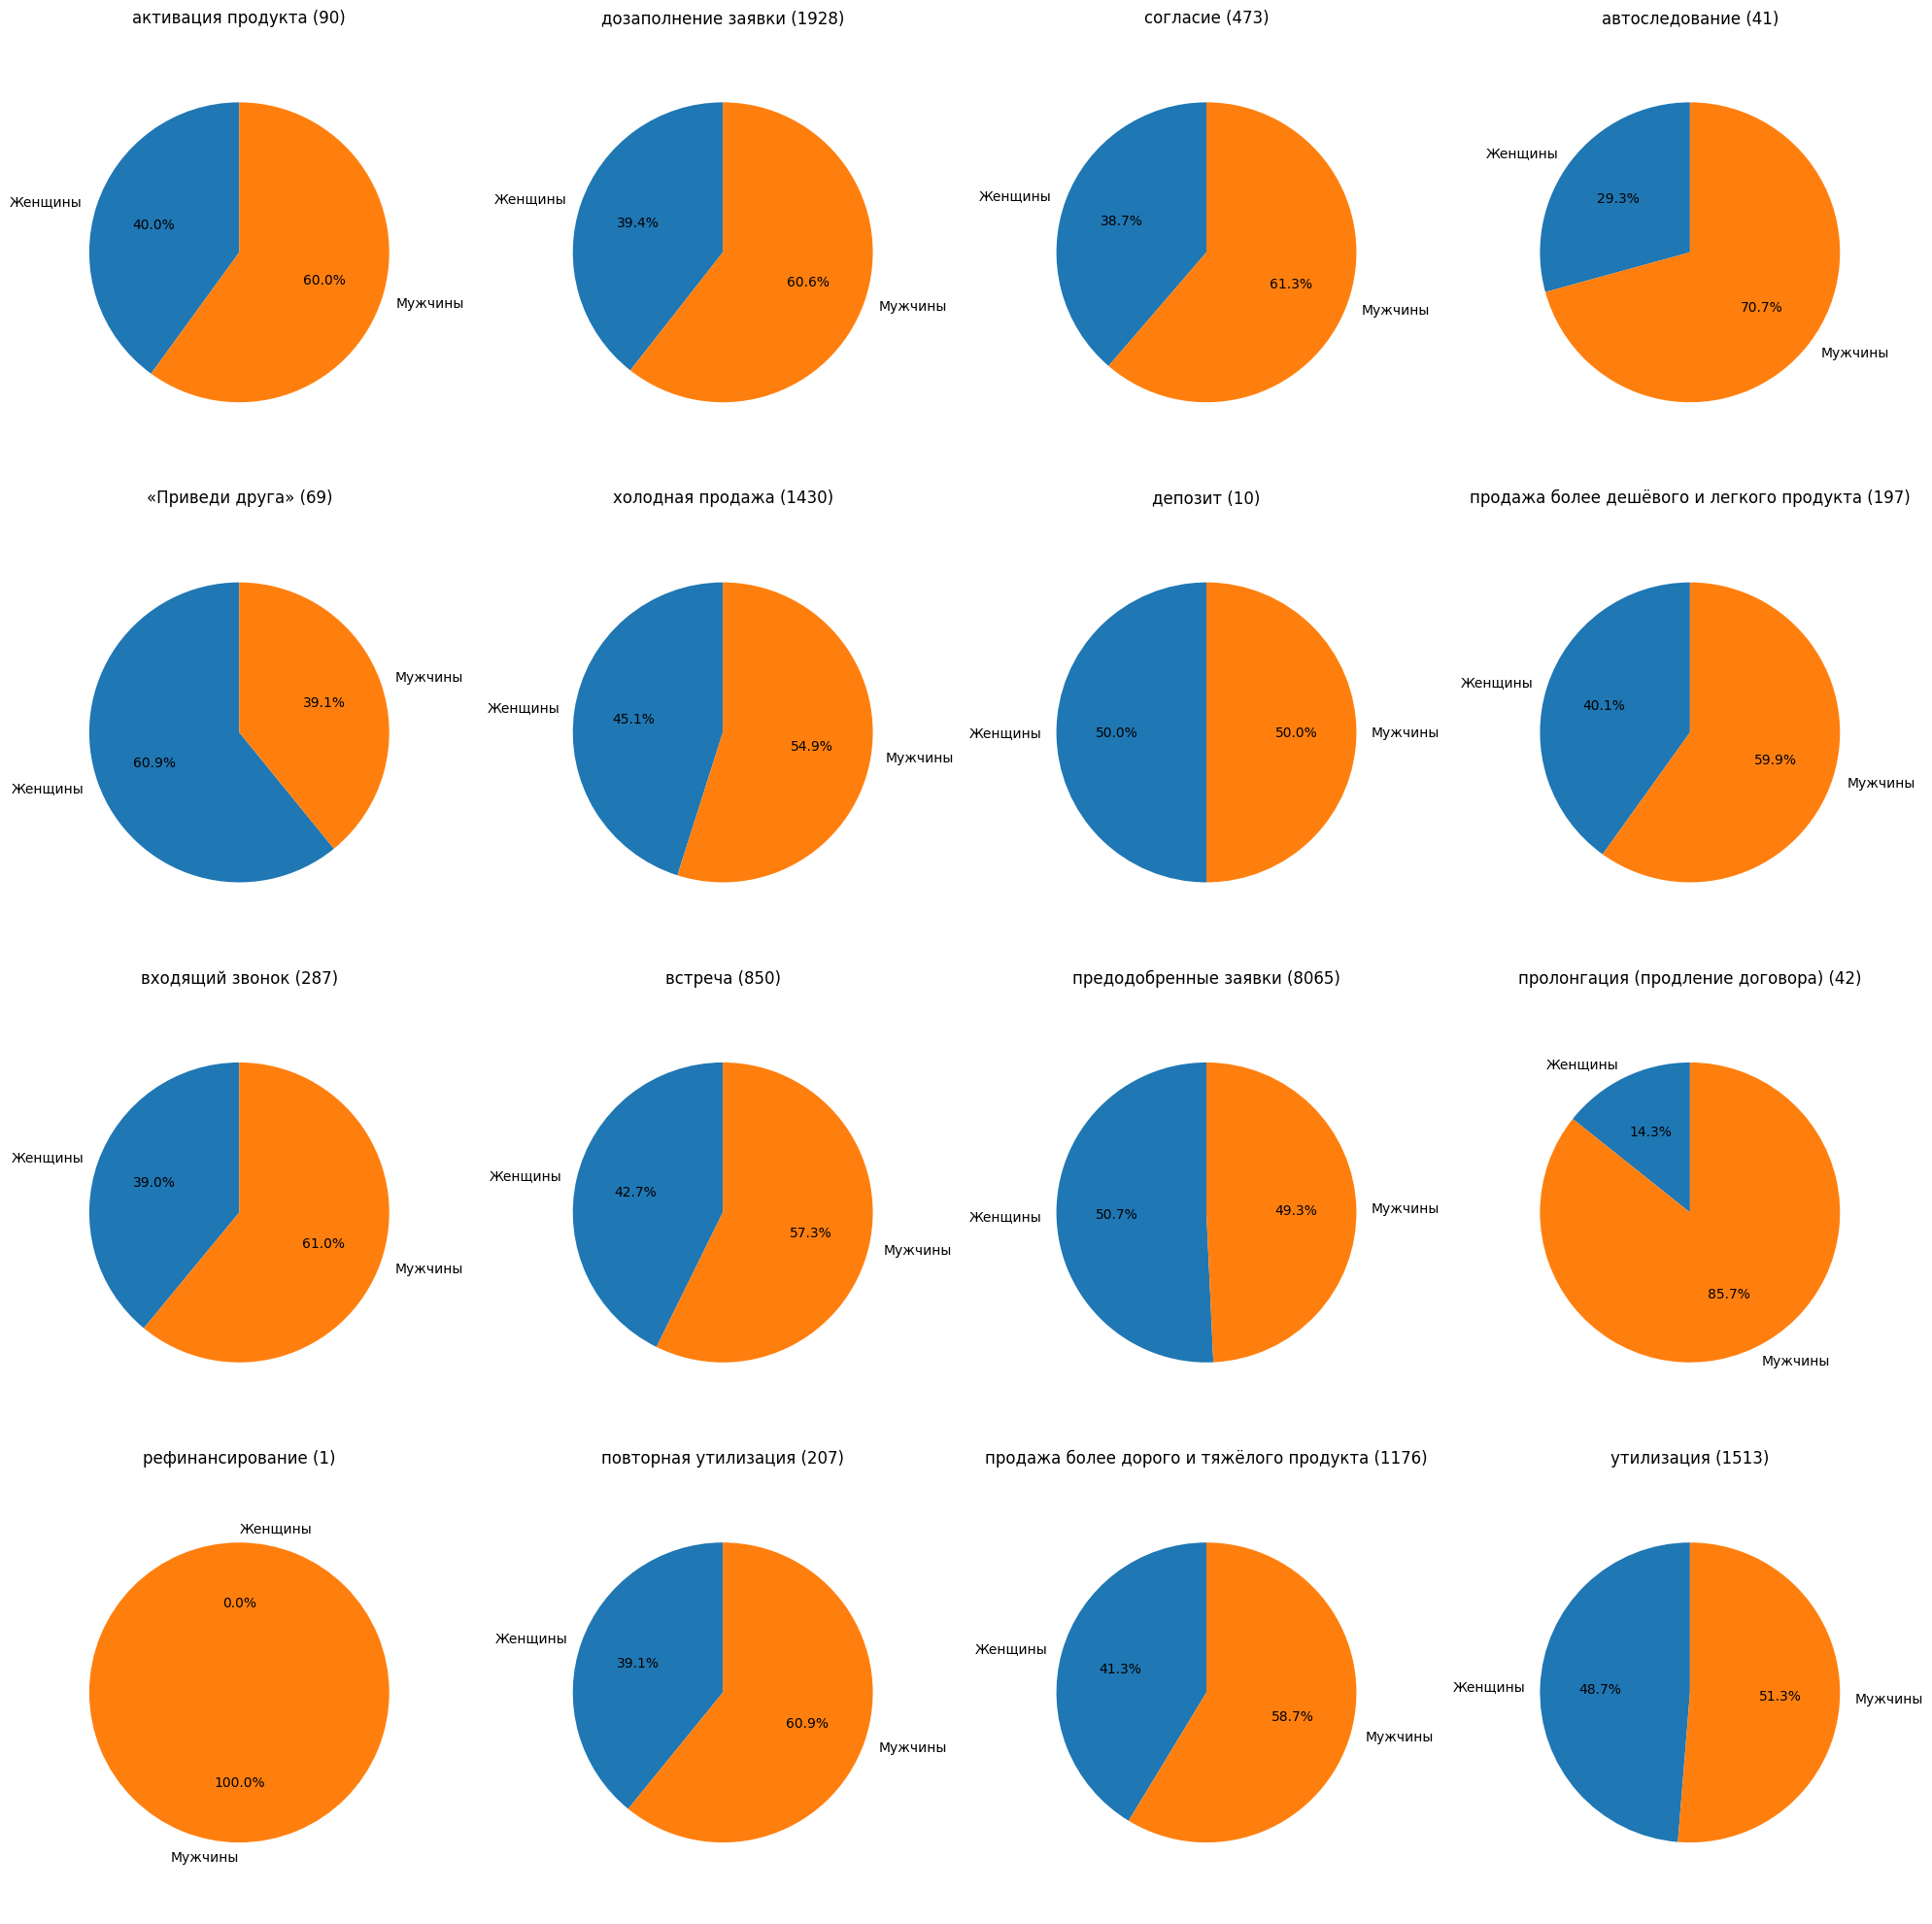

In [ ]:
gender_counts = df.groupby(['functional_cd', 'gender_cd']).size().unstack(fill_value=0)

num_plots = len(gender_counts)
cols = 4 
rows = (num_plots + cols - 1) // cols 

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 5))
axes = axes.flatten()  

labels = ['Женщины', 'Мужчины']

for i, functional in enumerate(gender_counts.index):
    total_count = gender_counts.loc[functional].sum()  
    axes[i].pie(gender_counts.loc[functional], autopct='%1.1f%%', startangle=90, labels=labels)
    axes[i].set_title(f"{translations[functional]} ({total_count})")
    axes[i].axis('equal')  

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() 
plt.show()


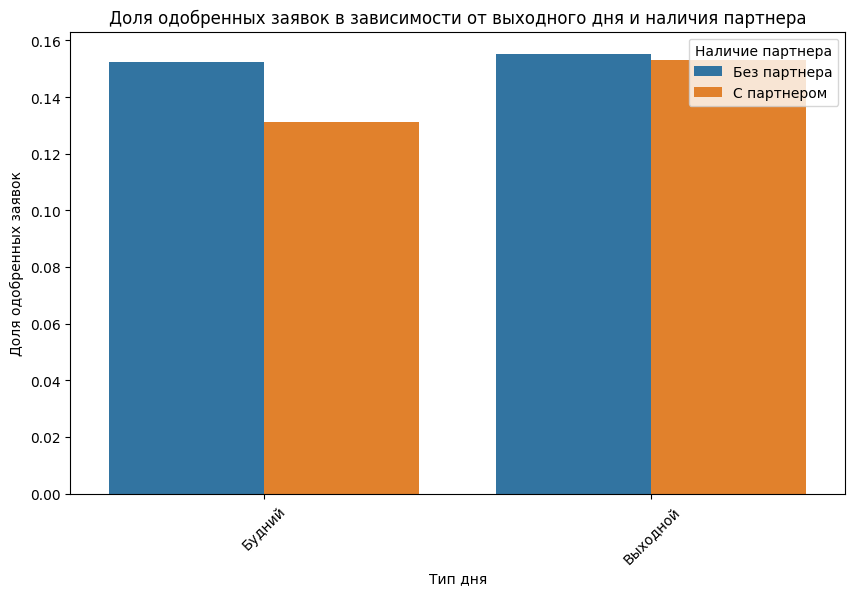

In [53]:
grouped = df.groupby(['is_holiday', 'partnership_flg', 'flag_call_result']).size().unstack(fill_value=0)

grouped['total'] = grouped.sum(axis=1)

grouped['approved_ratio'] = grouped[1] / grouped['total']

grouped.reset_index(inplace=True)


grouped['is_holiday'] = grouped['is_holiday'].replace({1: 'Выходной', 0: 'Будний'})
grouped['partnership_flg'] = grouped['partnership_flg'].replace({1: 'С партнером', 0: 'Без партнера'})

plt.figure(figsize=(10, 6))
sns.barplot(x='is_holiday', y='approved_ratio', hue='partnership_flg', data=grouped)
plt.title('Доля одобренных заявок в зависимости от выходного дня и наличия партнера')
plt.xlabel('Тип дня')
plt.ylabel('Доля одобренных заявок')
plt.xticks(rotation=45)
plt.legend(title='Наличие партнера')
plt.show()
plt.show()

TypeError: 'numpy.float64' object cannot be interpreted as an integer

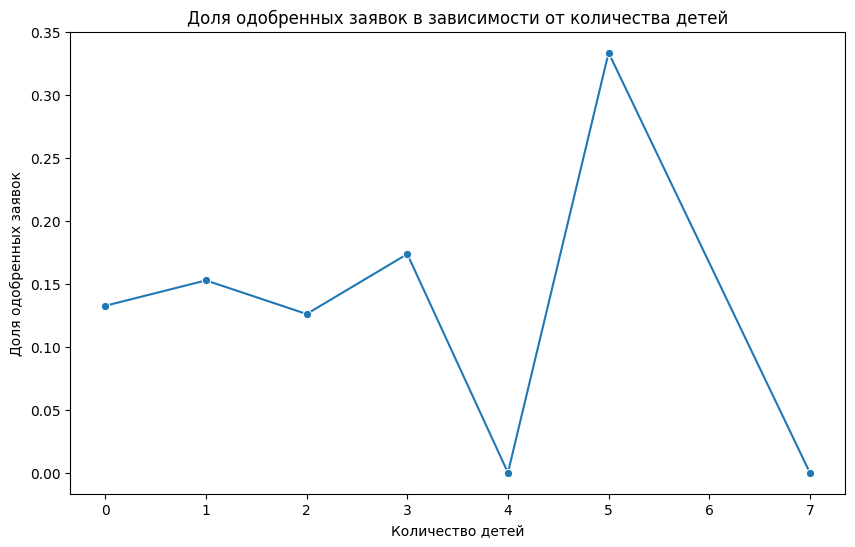

In [ ]:
grouped = df.groupby('child_amt').agg(
    total=('flag_call_result', 'size'),
    approved=('flag_call_result', lambda x: (x == 1).sum())
).reset_index()

grouped['approved_ratio'] = grouped['approved'] / grouped['total']

plt.figure(figsize=(10, 6))
sns.lineplot(x='child_amt', y='approved_ratio', data=grouped, marker='o')
plt.title('Доля одобренных заявок в зависимости от количества детей')
plt.xlabel('Количество детей')
plt.ylabel('Доля одобренных заявок')
plt.xticks(range(grouped['child_amt'].min(), grouped['child_amt'].max() + 1))
plt.grid()
plt.show()

In [42]:
grouped

,child_amt,total,approved,approved_ratio
0,0.0,6950,921,0.132518
1,1.0,2352,359,0.152636
2,2.0,524,66,0.125954
3,3.0,121,21,0.173554
4,4.0,13,0,0.000000
5,5.0,6,2,0.333333
6,7.0,1,0,0.000000


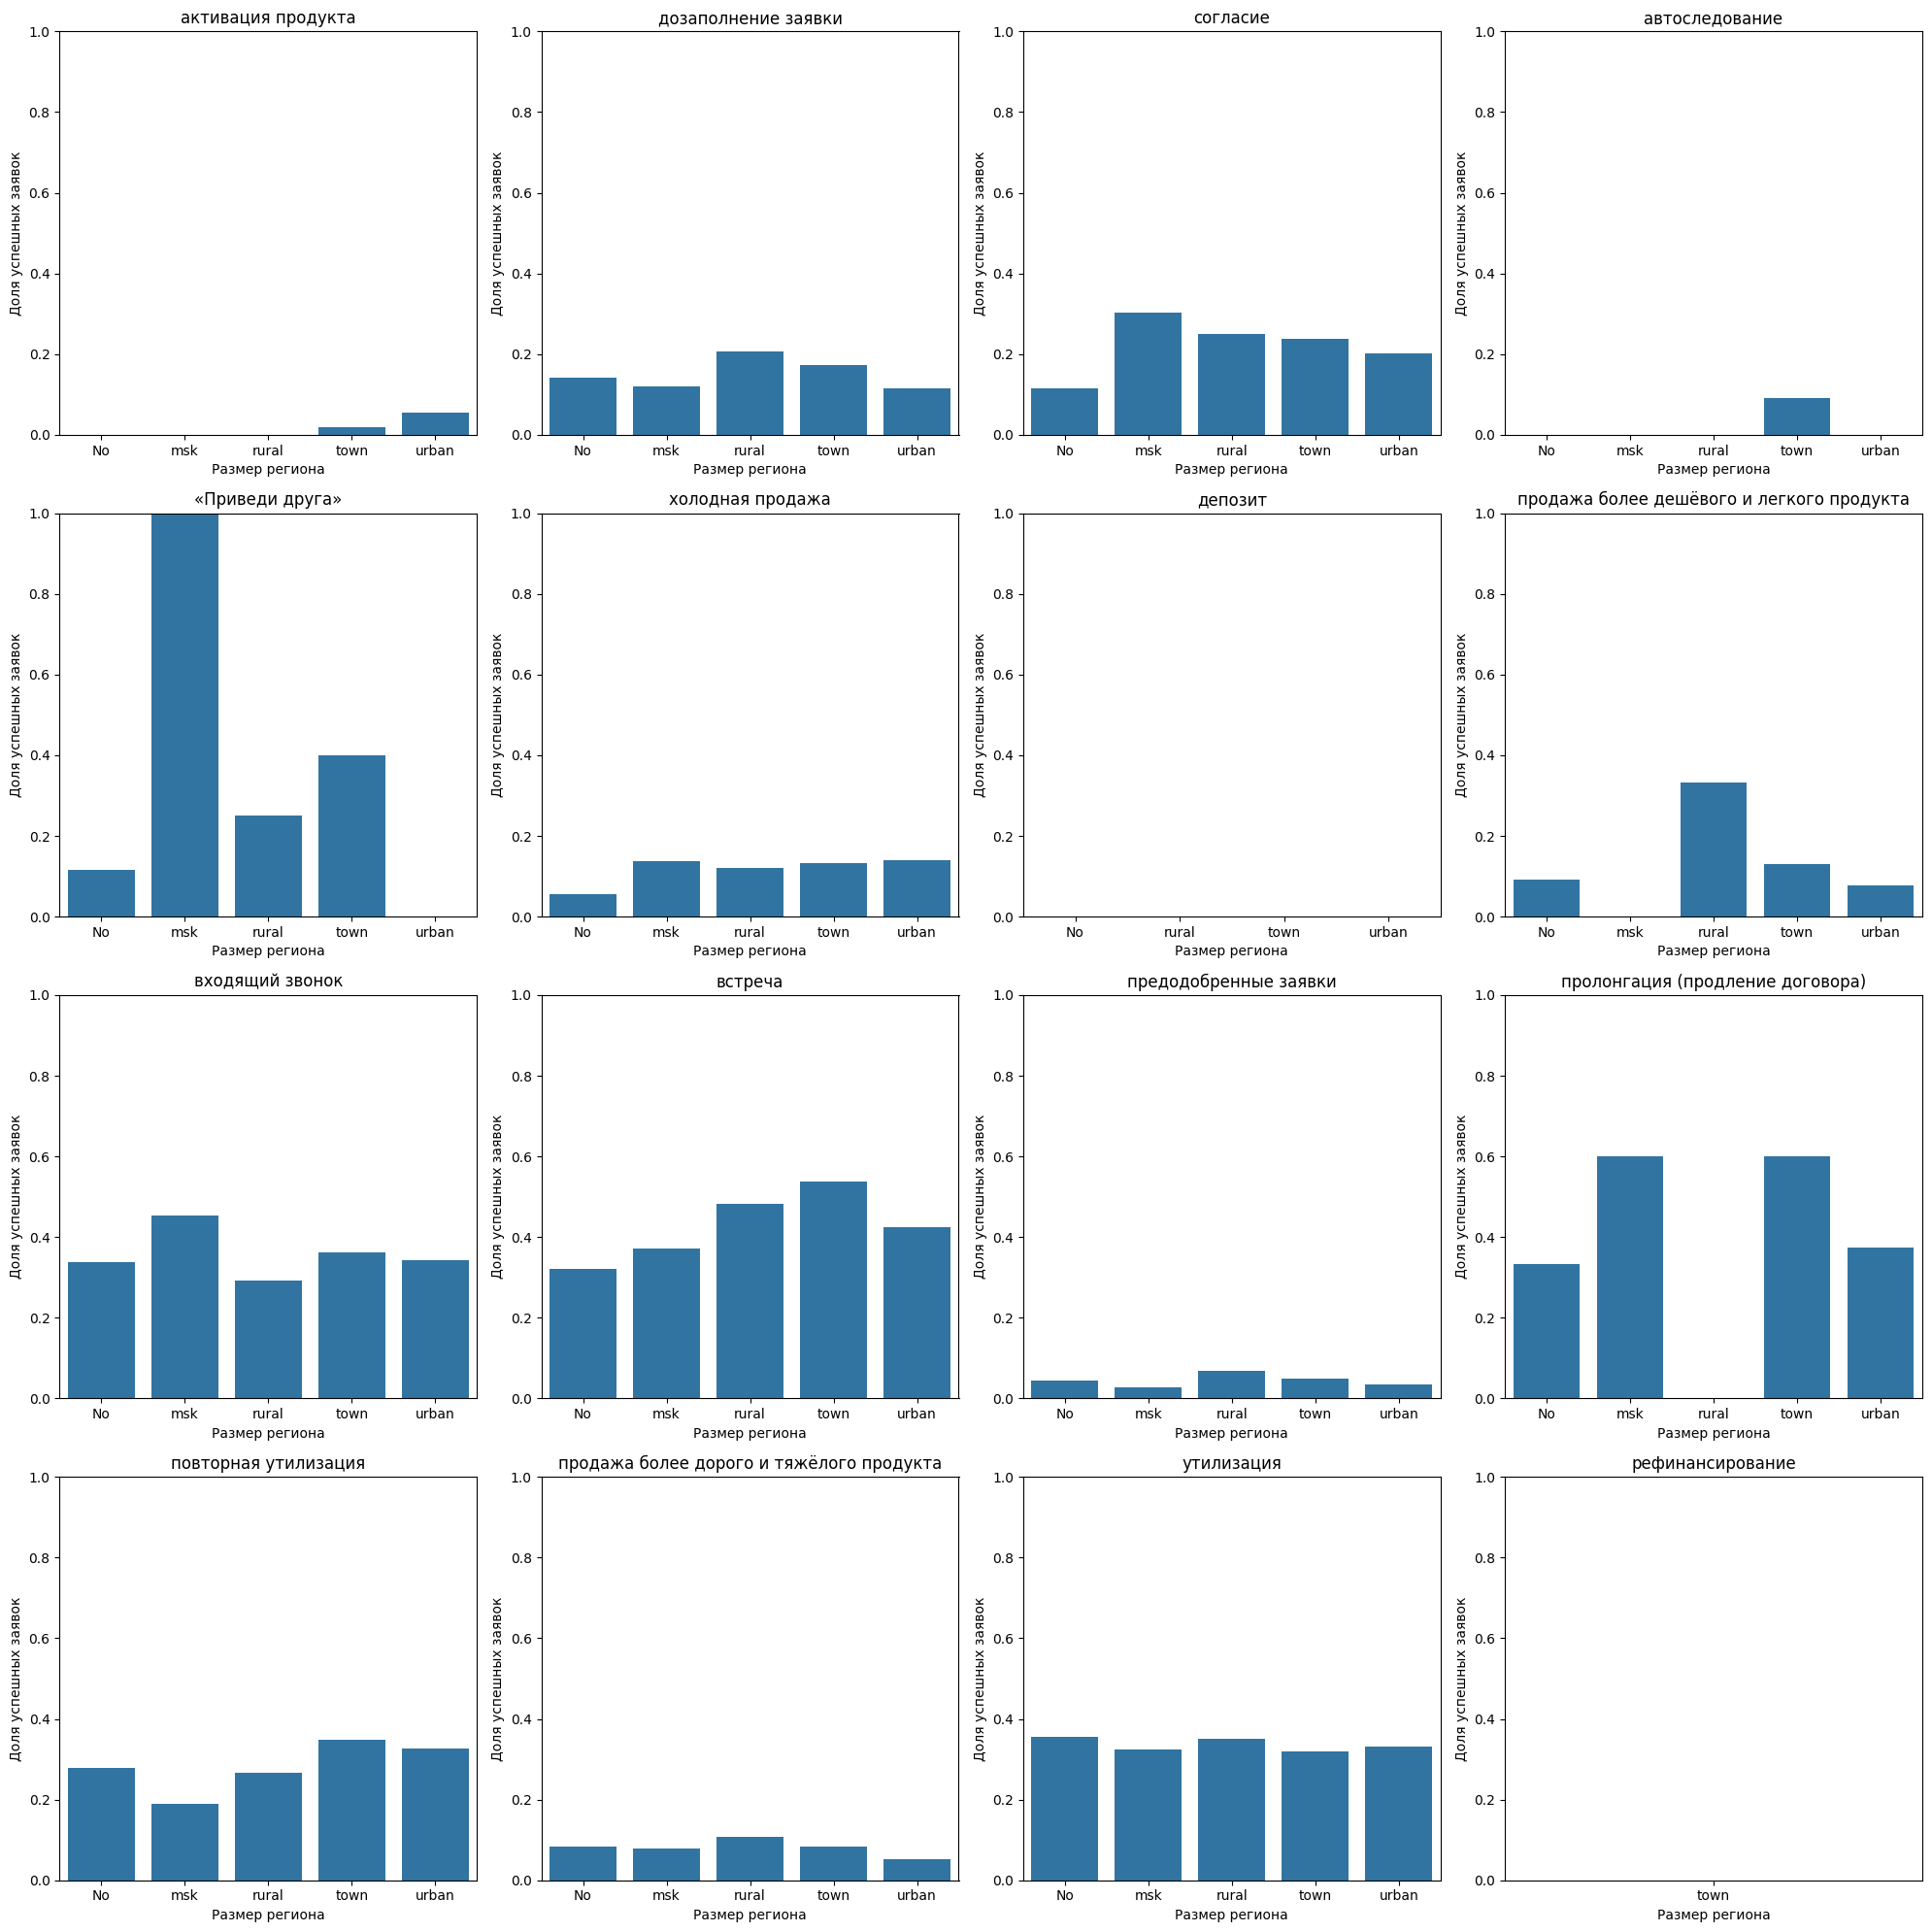

In [ ]:
grouped = df.groupby(['region_size', 'functional_cd']).agg(
    total=('flag_call_result', 'size'),
    approved=('flag_call_result', lambda x: (x == 1).sum())
).reset_index()

grouped['approved_ratio'] = grouped['approved'] / grouped['total']
functional_codes = grouped['functional_cd'].unique()


num_plots = len(functional_codes)
cols = 4
rows = (num_plots + cols - 1) // cols

plt.figure(figsize=(20, rows * 5))


for i, functional_code in enumerate(functional_codes):
    plt.subplot(rows, cols, i + 1)
    
    data_subset = grouped[grouped['functional_cd'] == functional_code]
    
    sns.barplot(x='region_size', y='approved_ratio', data=data_subset)
    
    plt.title(translations[functional_code])
    plt.xlabel('Размер региона')
    plt.ylabel('Доля успешных заявок')
    plt.ylim(0, 1) 

plt.tight_layout()
plt.show()

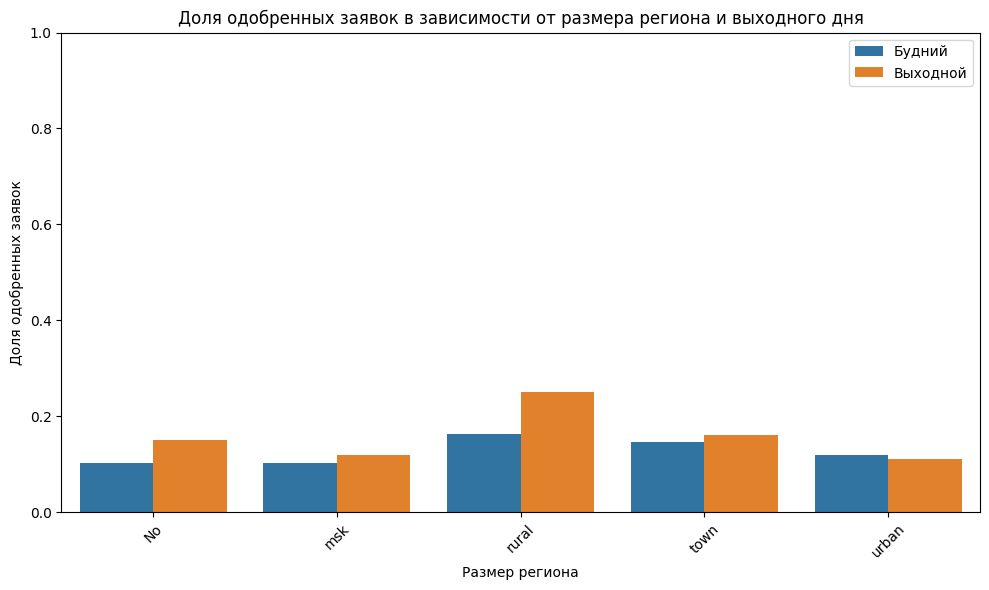

In [54]:
grouped = df.groupby(['region_size', 'is_holiday']).agg(
    total=('flag_call_result', 'size'),
    approved=('flag_call_result', lambda x: (x == 1).sum())
).reset_index()

grouped['approved_ratio'] = grouped['approved'] / grouped['total']
grouped['is_holiday'] = grouped['is_holiday'].replace({1: 'Выходной', 0: 'Будний'})

plt.figure(figsize=(10, 6))

sns.barplot(x='region_size', y='approved_ratio', hue='is_holiday', data=grouped)

plt.title('Доля одобренных заявок в зависимости от размера региона и выходного дня')
plt.xlabel('Размер региона')
plt.ylabel('Доля одобренных заявок')
plt.ylim(0, 1)
plt.xticks(rotation=45)

plt.legend()

plt.tight_layout()
plt.show()

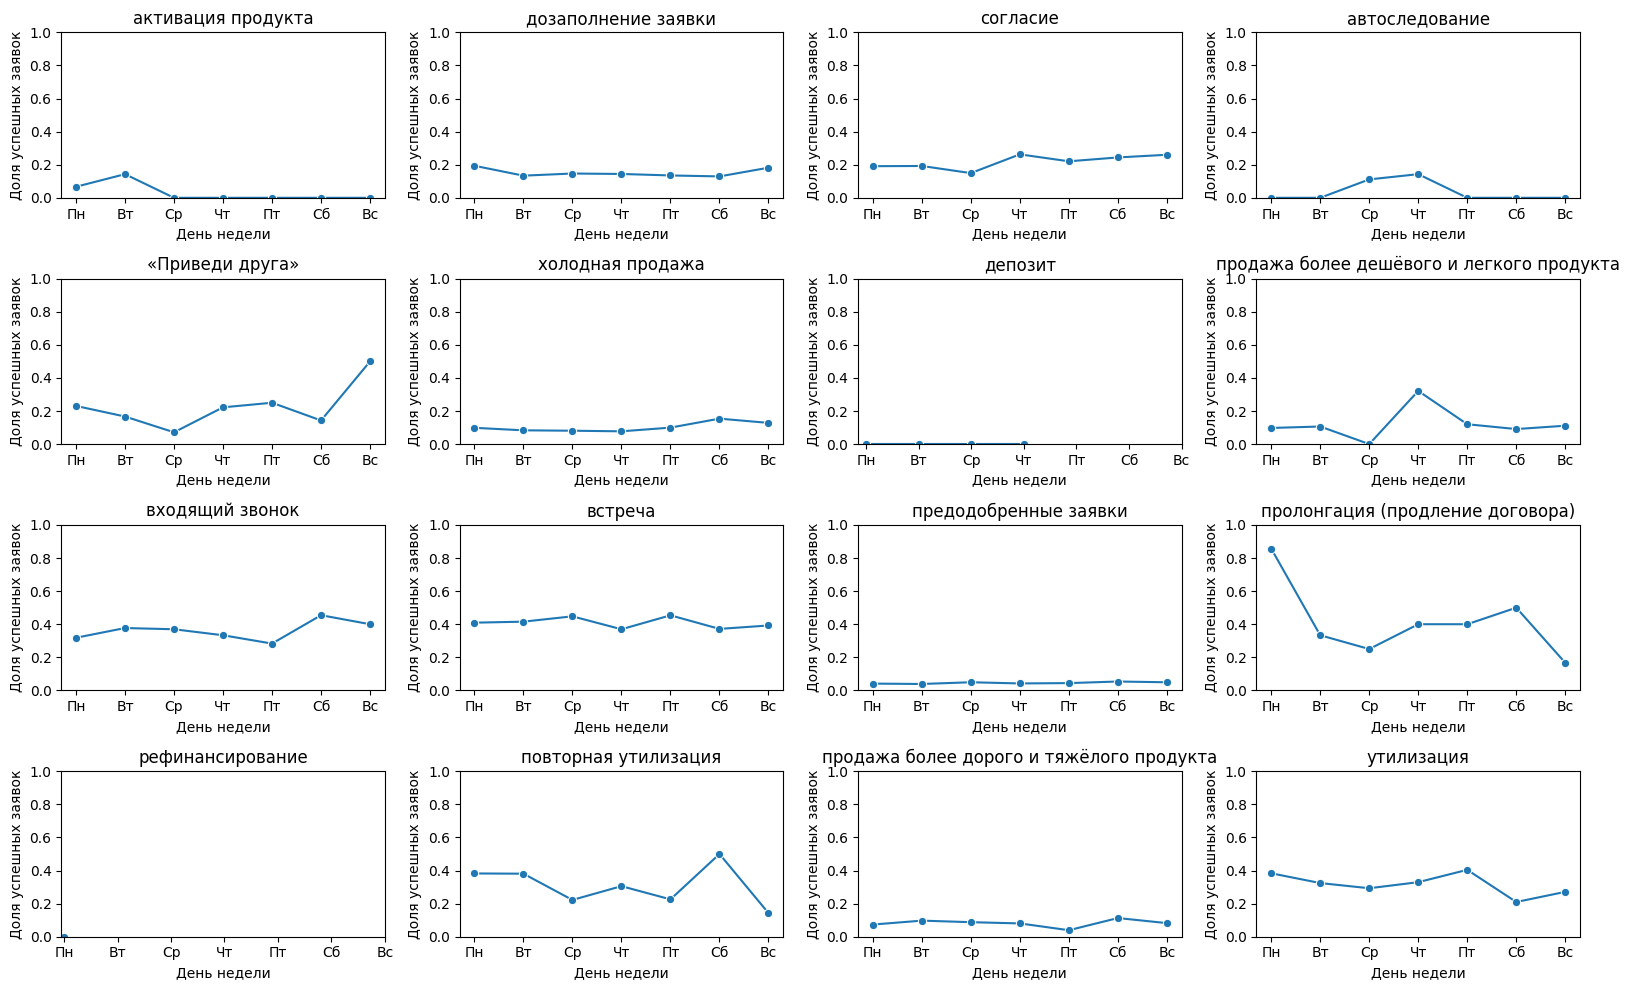

In [56]:
grouped = df.groupby(['day_of_week', 'functional_cd']).agg(
    total=('flag_call_result', 'size'),
    approved=('flag_call_result', lambda x: (x == 1).sum())
).reset_index()

grouped['approved_ratio'] = grouped['approved'] / grouped['total']

functional_codes = grouped['functional_cd'].unique()

plt.figure(figsize=(16, 10))

num_plots = len(functional_codes)
cols = 4
rows = (num_plots + cols - 1) // cols

for i, functional_code in enumerate(functional_codes):
    plt.subplot(rows, cols, i + 1)
    
    subset = grouped[grouped['functional_cd'] == functional_code]
    
    sns.lineplot(x='day_of_week', y='approved_ratio', data=subset, marker='o')
    
    plt.title(translations[functional_code])
    plt.xlabel('День недели')
    plt.ylabel('Доля успешных заявок')
    plt.xticks(range(7), ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
    plt.ylim(0, 1)

plt.tight_layout()
plt.show()

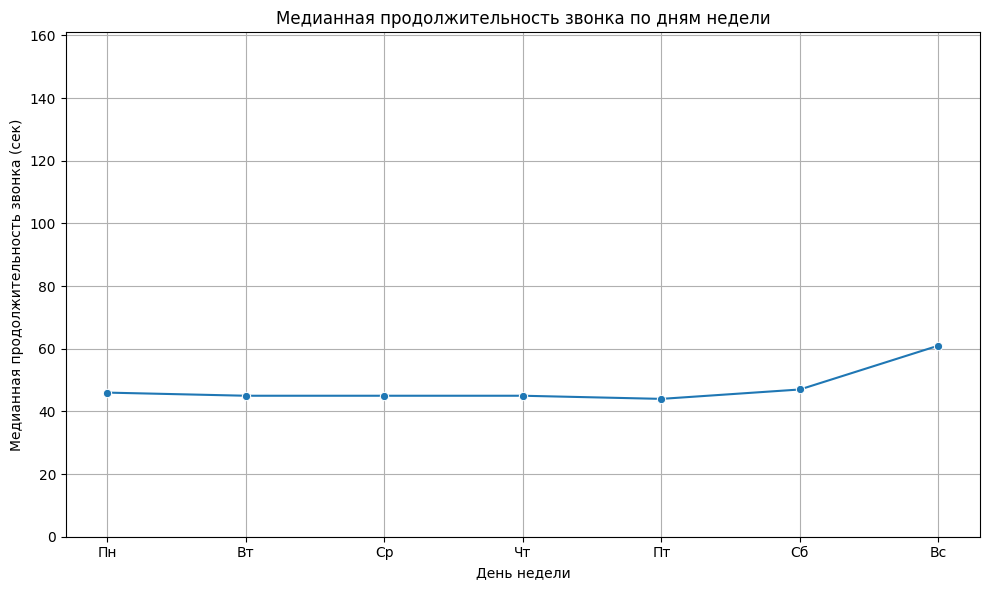

In [65]:
median_talk_time = df.groupby('day_of_week')['state_talk_time_sec'].median().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='day_of_week', y='state_talk_time_sec', data=median_talk_time, marker='o')

plt.title('Медианная продолжительность звонка по дням недели')
plt.xlabel('День недели')
plt.ylabel('Медианная продолжительность звонка (сек)')
plt.xticks(range(7), ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.ylim(0, median_talk_time['state_talk_time_sec'].max() + 100)

plt.grid()
plt.tight_layout()
plt.show()

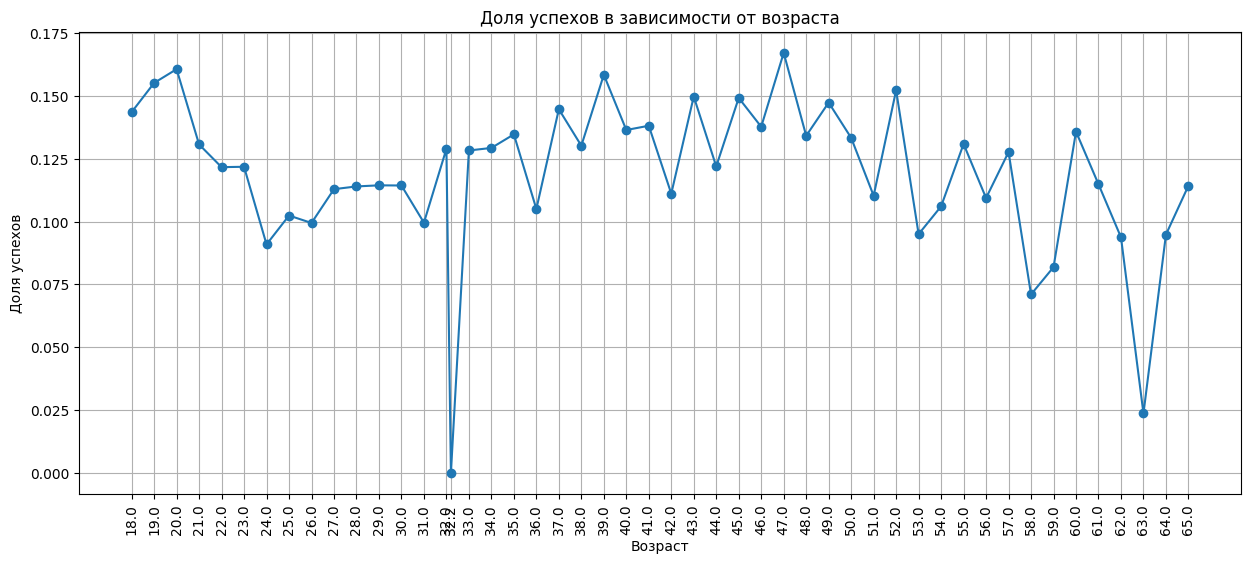

In [ ]:
success_rate = df.groupby('age')['flag_call_result'].mean().reset_index()

success_rate.columns = ['age', 'success_rate']

plt.figure(figsize=(15, 6))
plt.plot(success_rate['age'], success_rate['success_rate'], marker='o')
plt.title('Доля успехов в зависимости от возраста')
plt.xlabel('Возраст')
plt.ylabel('Доля успехов')
plt.xticks(success_rate['age'], rotation=90)
plt.grid()
plt.show()

C:\Users\valer\AppData\Local\Temp\ipykernel_17060\1400843756.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  success_rate = df.groupby('age_cat')['flag_call_result'].mean().reset_index()


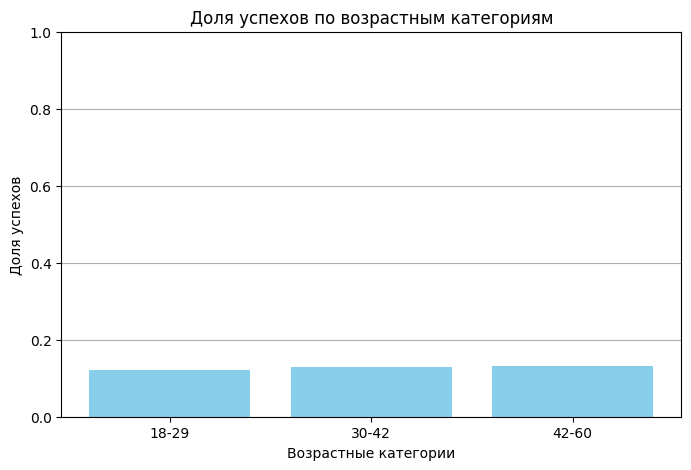

In [ ]:
success_rate = df.groupby('age_cat')['flag_call_result'].mean().reset_index()

success_rate.columns = ['age_cat', 'success_rate']

plt.figure(figsize=(8, 5))
plt.bar(success_rate['age_cat'], success_rate['success_rate'], color='skyblue')
plt.title('Доля успехов по возрастным категориям')
plt.xlabel('Возрастные категории')
plt.ylabel('Доля успехов')
plt.ylim(0, 1) 
plt.grid(axis='y')
plt.show()

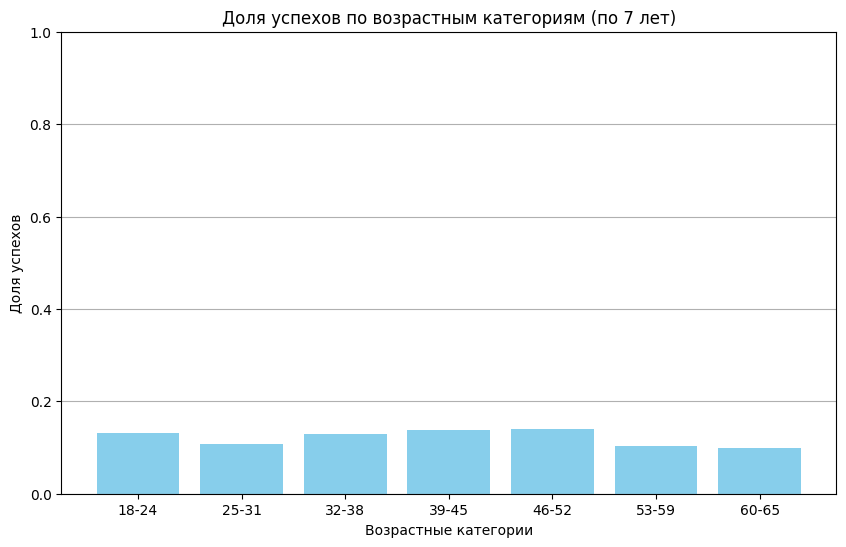

In [ ]:
def age_category(age):
    if age < 25:
        return '18-24'
    elif age < 32:
        return '25-31'
    elif age < 39:
        return '32-38'
    elif age < 46:
        return '39-45'
    elif age < 53:
        return '46-52'
    elif age < 60:
        return '53-59'
    else:
        return '60-65'

df['age_cat'] = df['age'].apply(age_category)


success_rate = df.groupby('age_cat')['flag_call_result'].mean().reset_index()

success_rate.columns = ['age_cat', 'success_rate']

plt.figure(figsize=(10, 6))
plt.bar(success_rate['age_cat'], success_rate['success_rate'], color='skyblue')
plt.title('Доля успехов по возрастным категориям (по 7 лет)')
plt.xlabel('Возрастные категории')
plt.ylabel('Доля успехов')
plt.ylim(0, 1)  
plt.grid(axis='y')
plt.show()

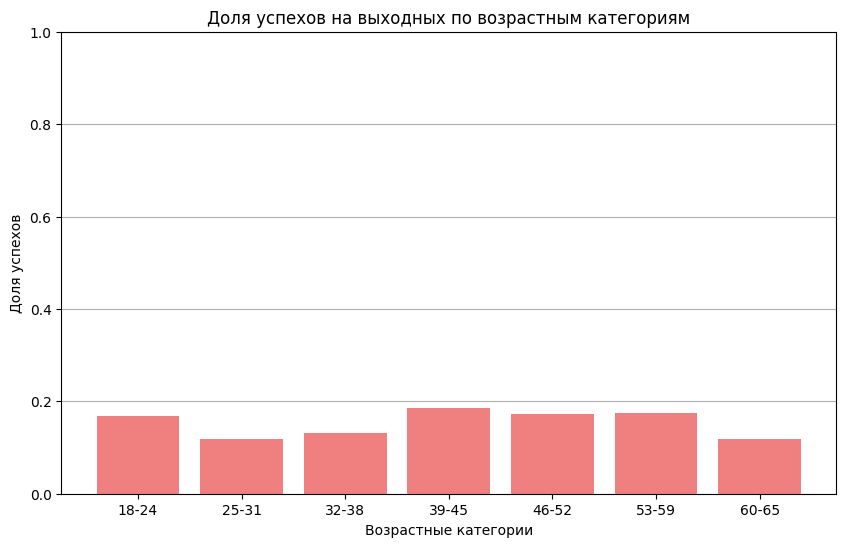

In [ ]:
weekend_data = df[df['is_holiday'] == 1]

success_rate_weekend = weekend_data.groupby('age_cat')['flag_call_result'].mean().reset_index()

success_rate_weekend.columns = ['age_cat', 'success_rate']

plt.figure(figsize=(10, 6))
plt.bar(success_rate_weekend['age_cat'], success_rate_weekend['success_rate'], color='lightcoral')
plt.title('Доля успехов на выходных по возрастным категориям')
plt.xlabel('Возрастные категории')
plt.ylabel('Доля успехов')
plt.ylim(0, 1) 
plt.grid(axis='y')
plt.show()

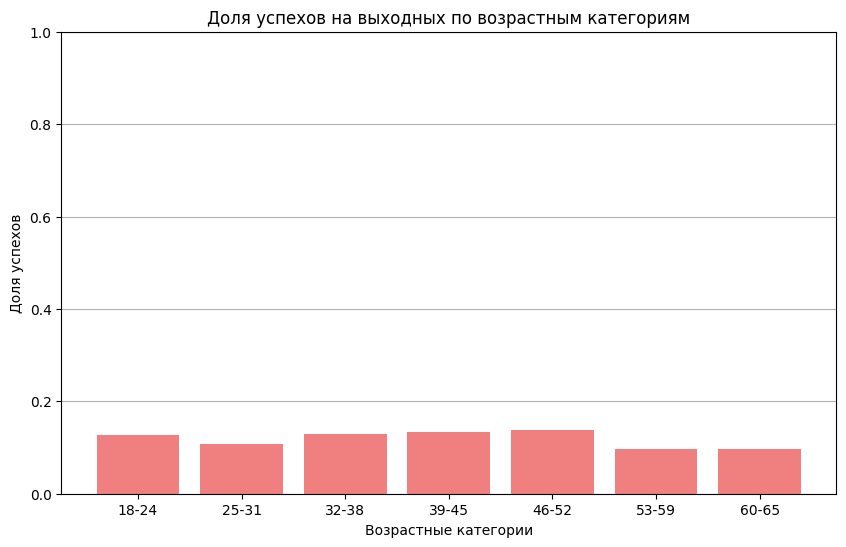

In [ ]:
weekend_data = df[df['is_holiday'] == 0]

success_rate_weekend = weekend_data.groupby('age_cat')['flag_call_result'].mean().reset_index()

success_rate_weekend.columns = ['age_cat', 'success_rate']

plt.figure(figsize=(10, 6))
plt.bar(success_rate_weekend['age_cat'], success_rate_weekend['success_rate'], color='lightcoral')
plt.title('Доля успехов на выходных по возрастным категориям')
plt.xlabel('Возрастные категории')
plt.ylabel('Доля успехов')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

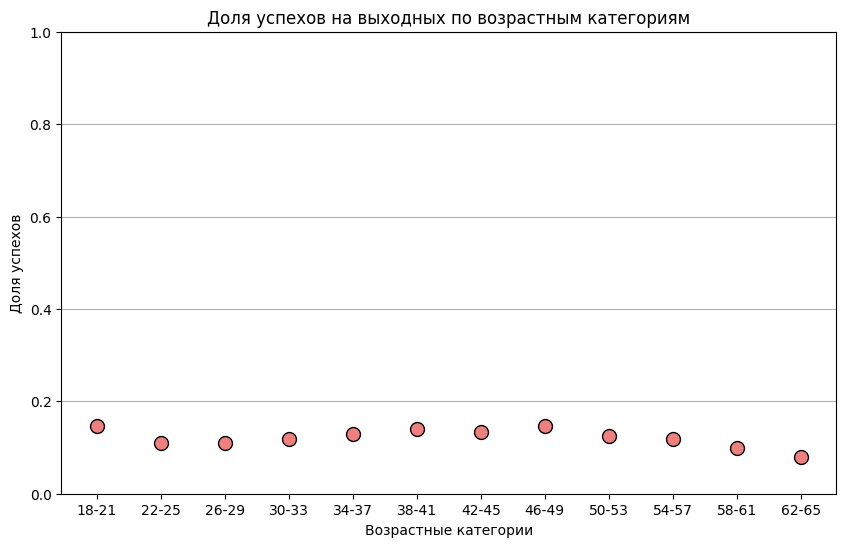

In [ ]:
def age_category(age):
    if age < 22:
        return '18-21'
    elif age < 26:
        return '22-25'
    elif age < 30:
        return '26-29'
    elif age < 34:
        return '30-33'
    elif age < 38:
        return '34-37'
    elif age < 42:
        return '38-41'
    elif age < 46:
        return '42-45'
    elif age < 50:
        return '46-49'
    elif age < 54:
        return '50-53'
    elif age < 58:
        return '54-57'
    elif age < 62:
        return '58-61'
    else:
        return '62-65'
    
df['age_cat'] = df['age'].apply(age_category)


weekend_data = df


success_rate_weekend = weekend_data.groupby('age_cat')['flag_call_result'].mean().reset_index()

success_rate_weekend.columns = ['age_cat', 'success_rate']


plt.figure(figsize=(10, 6))
plt.scatter(success_rate_weekend['age_cat'], success_rate_weekend['success_rate'], s=100, color='lightcoral', edgecolor='black')
plt.title('Доля успехов на выходных по возрастным категориям')
plt.xlabel('Возрастные категории')
plt.ylabel('Доля успехов')
plt.ylim(0, 1) 
plt.grid(axis='y')
plt.show()

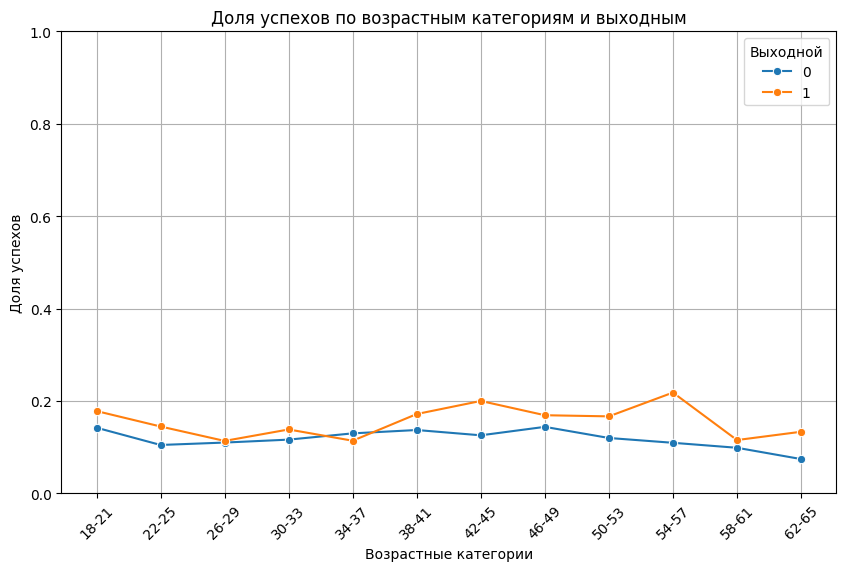

In [ ]:
def age_category(age):
    if age < 22:
        return '18-21'
    elif age < 26:
        return '22-25'
    elif age < 30:
        return '26-29'
    elif age < 34:
        return '30-33'
    elif age < 38:
        return '34-37'
    elif age < 42:
        return '38-41'
    elif age < 46:
        return '42-45'
    elif age < 50:
        return '46-49'
    elif age < 54:
        return '50-53'
    elif age < 58:
        return '54-57'
    elif age < 62:
        return '58-61'
    else:
        return '62-65'

df['age_cat'] = df['age'].apply(age_category)


success_rate = df.groupby(['age_cat', 'is_holiday'])['flag_call_result'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=success_rate, x='age_cat', y='flag_call_result', hue='is_holiday', marker='o')

plt.title('Доля успехов по возрастным категориям и выходным')
plt.xlabel('Возрастные категории')
plt.ylabel('Доля успехов')
plt.ylim(0, 1) 
plt.grid()
plt.xticks(rotation=45)
plt.legend(title='Выходной')
plt.show()

C:\Users\valer\AppData\Local\Temp\ipykernel_17060\871683426.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=success_rate, x='is_holiday', y='success_rate', palette='viridis')


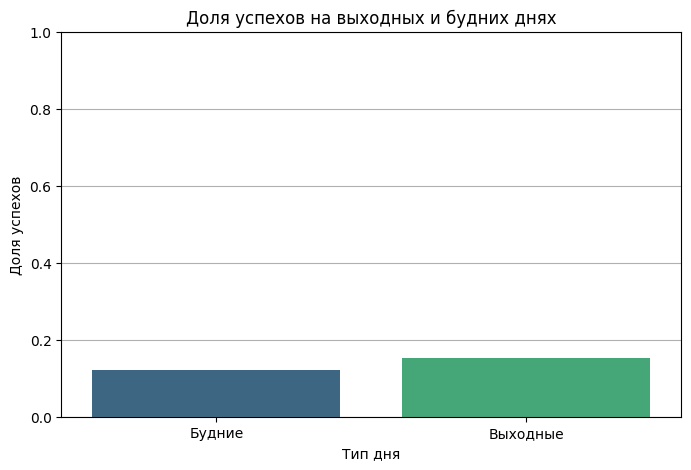

In [77]:
success_rate = df.groupby('is_holiday')['flag_call_result'].mean().reset_index()
success_rate['is_holiday'] = success_rate['is_holiday'].map({0: 'Будние', 1: 'Выходные'})
success_rate.columns = ['is_holiday', 'success_rate']

plt.figure(figsize=(8, 5))
sns.barplot(data=success_rate, x='is_holiday', y='success_rate', palette='viridis')
plt.title('Доля успехов на выходных и будних днях')
plt.xlabel('Тип дня')
plt.ylabel('Доля успехов')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

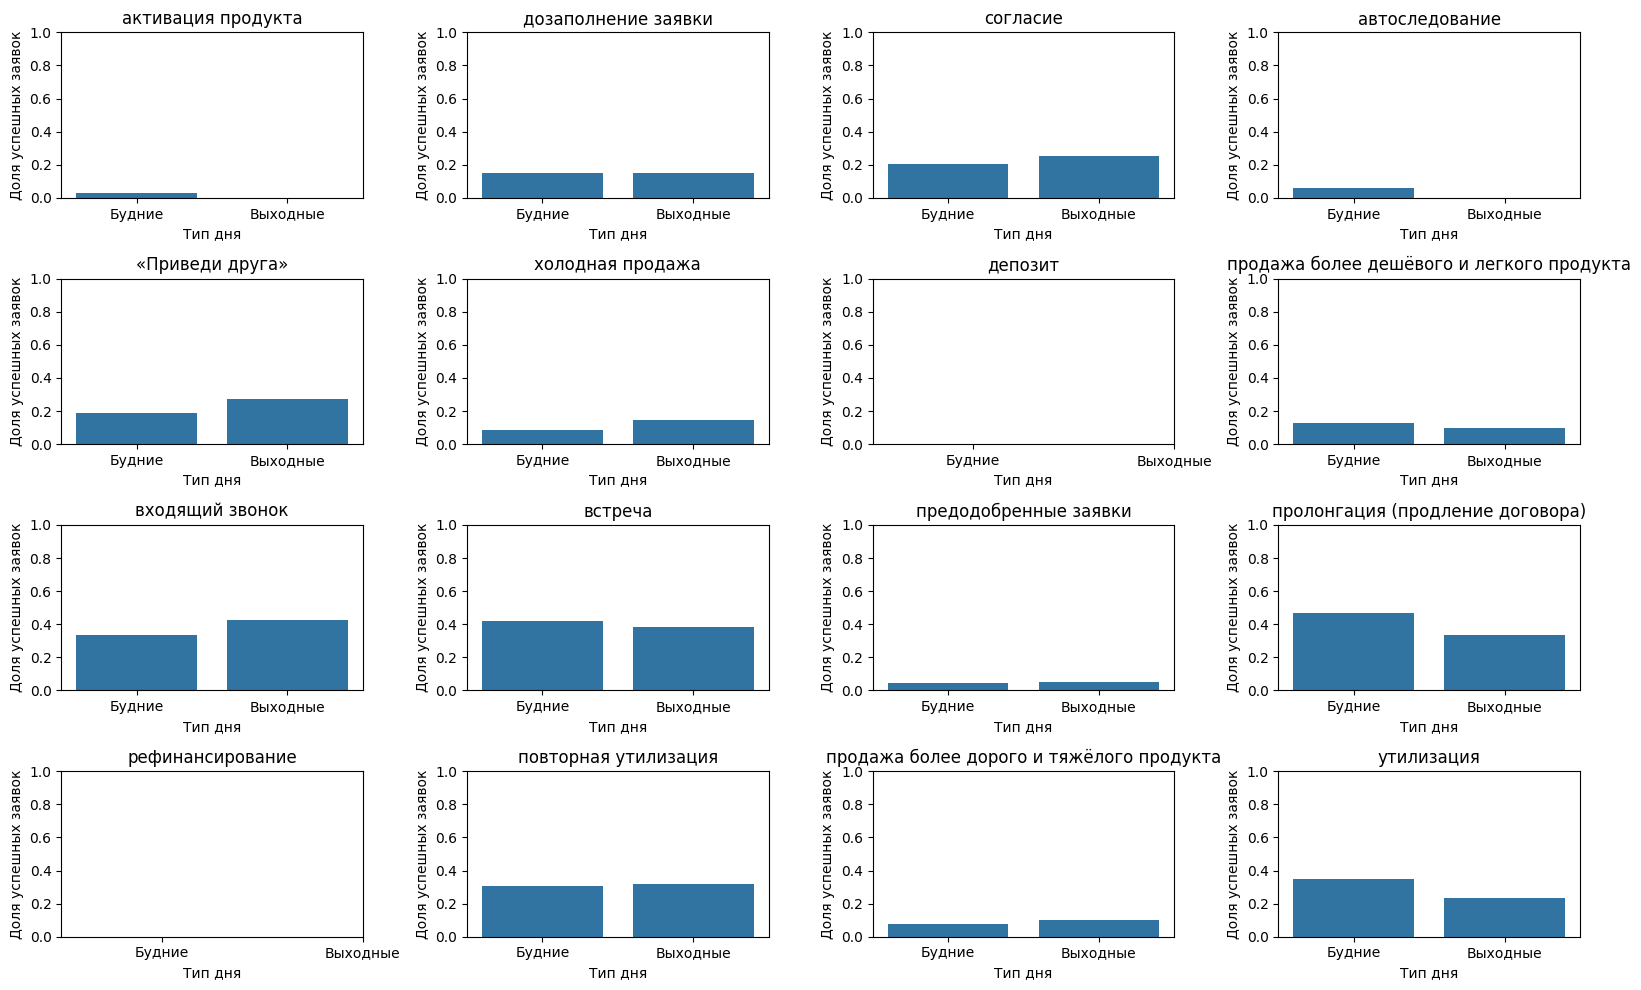

In [ ]:
grouped = df.groupby(['is_holiday', 'functional_cd']).agg(
    total=('flag_call_result', 'size'),
    approved=('flag_call_result', lambda x: (x == 1).sum())
).reset_index()

grouped['approved_ratio'] = grouped['approved'] / grouped['total']

functional_codes = grouped['functional_cd'].unique()

plt.figure(figsize=(16, 10))

num_plots = len(functional_codes)
cols = 4
rows = (num_plots + cols - 1) // cols

for i, functional_code in enumerate(functional_codes):
    plt.subplot(rows, cols, i + 1)
    
    subset = grouped[grouped['functional_cd'] == functional_code]
    
    sns.barplot(x='is_holiday', y='approved_ratio', data=subset)
    
    plt.title(translations[functional_code])
    plt.xlabel('Тип дня')
    plt.ylabel('Доля успешных заявок')
    plt.xticks(ticks=[0, 1], labels=['Будние', 'Выходные'])
    plt.ylim(0, 1)

plt.tight_layout()
plt.show()

In [89]:
df['bundle_nm'] = df['bundle_nm'].fillna('XXX')

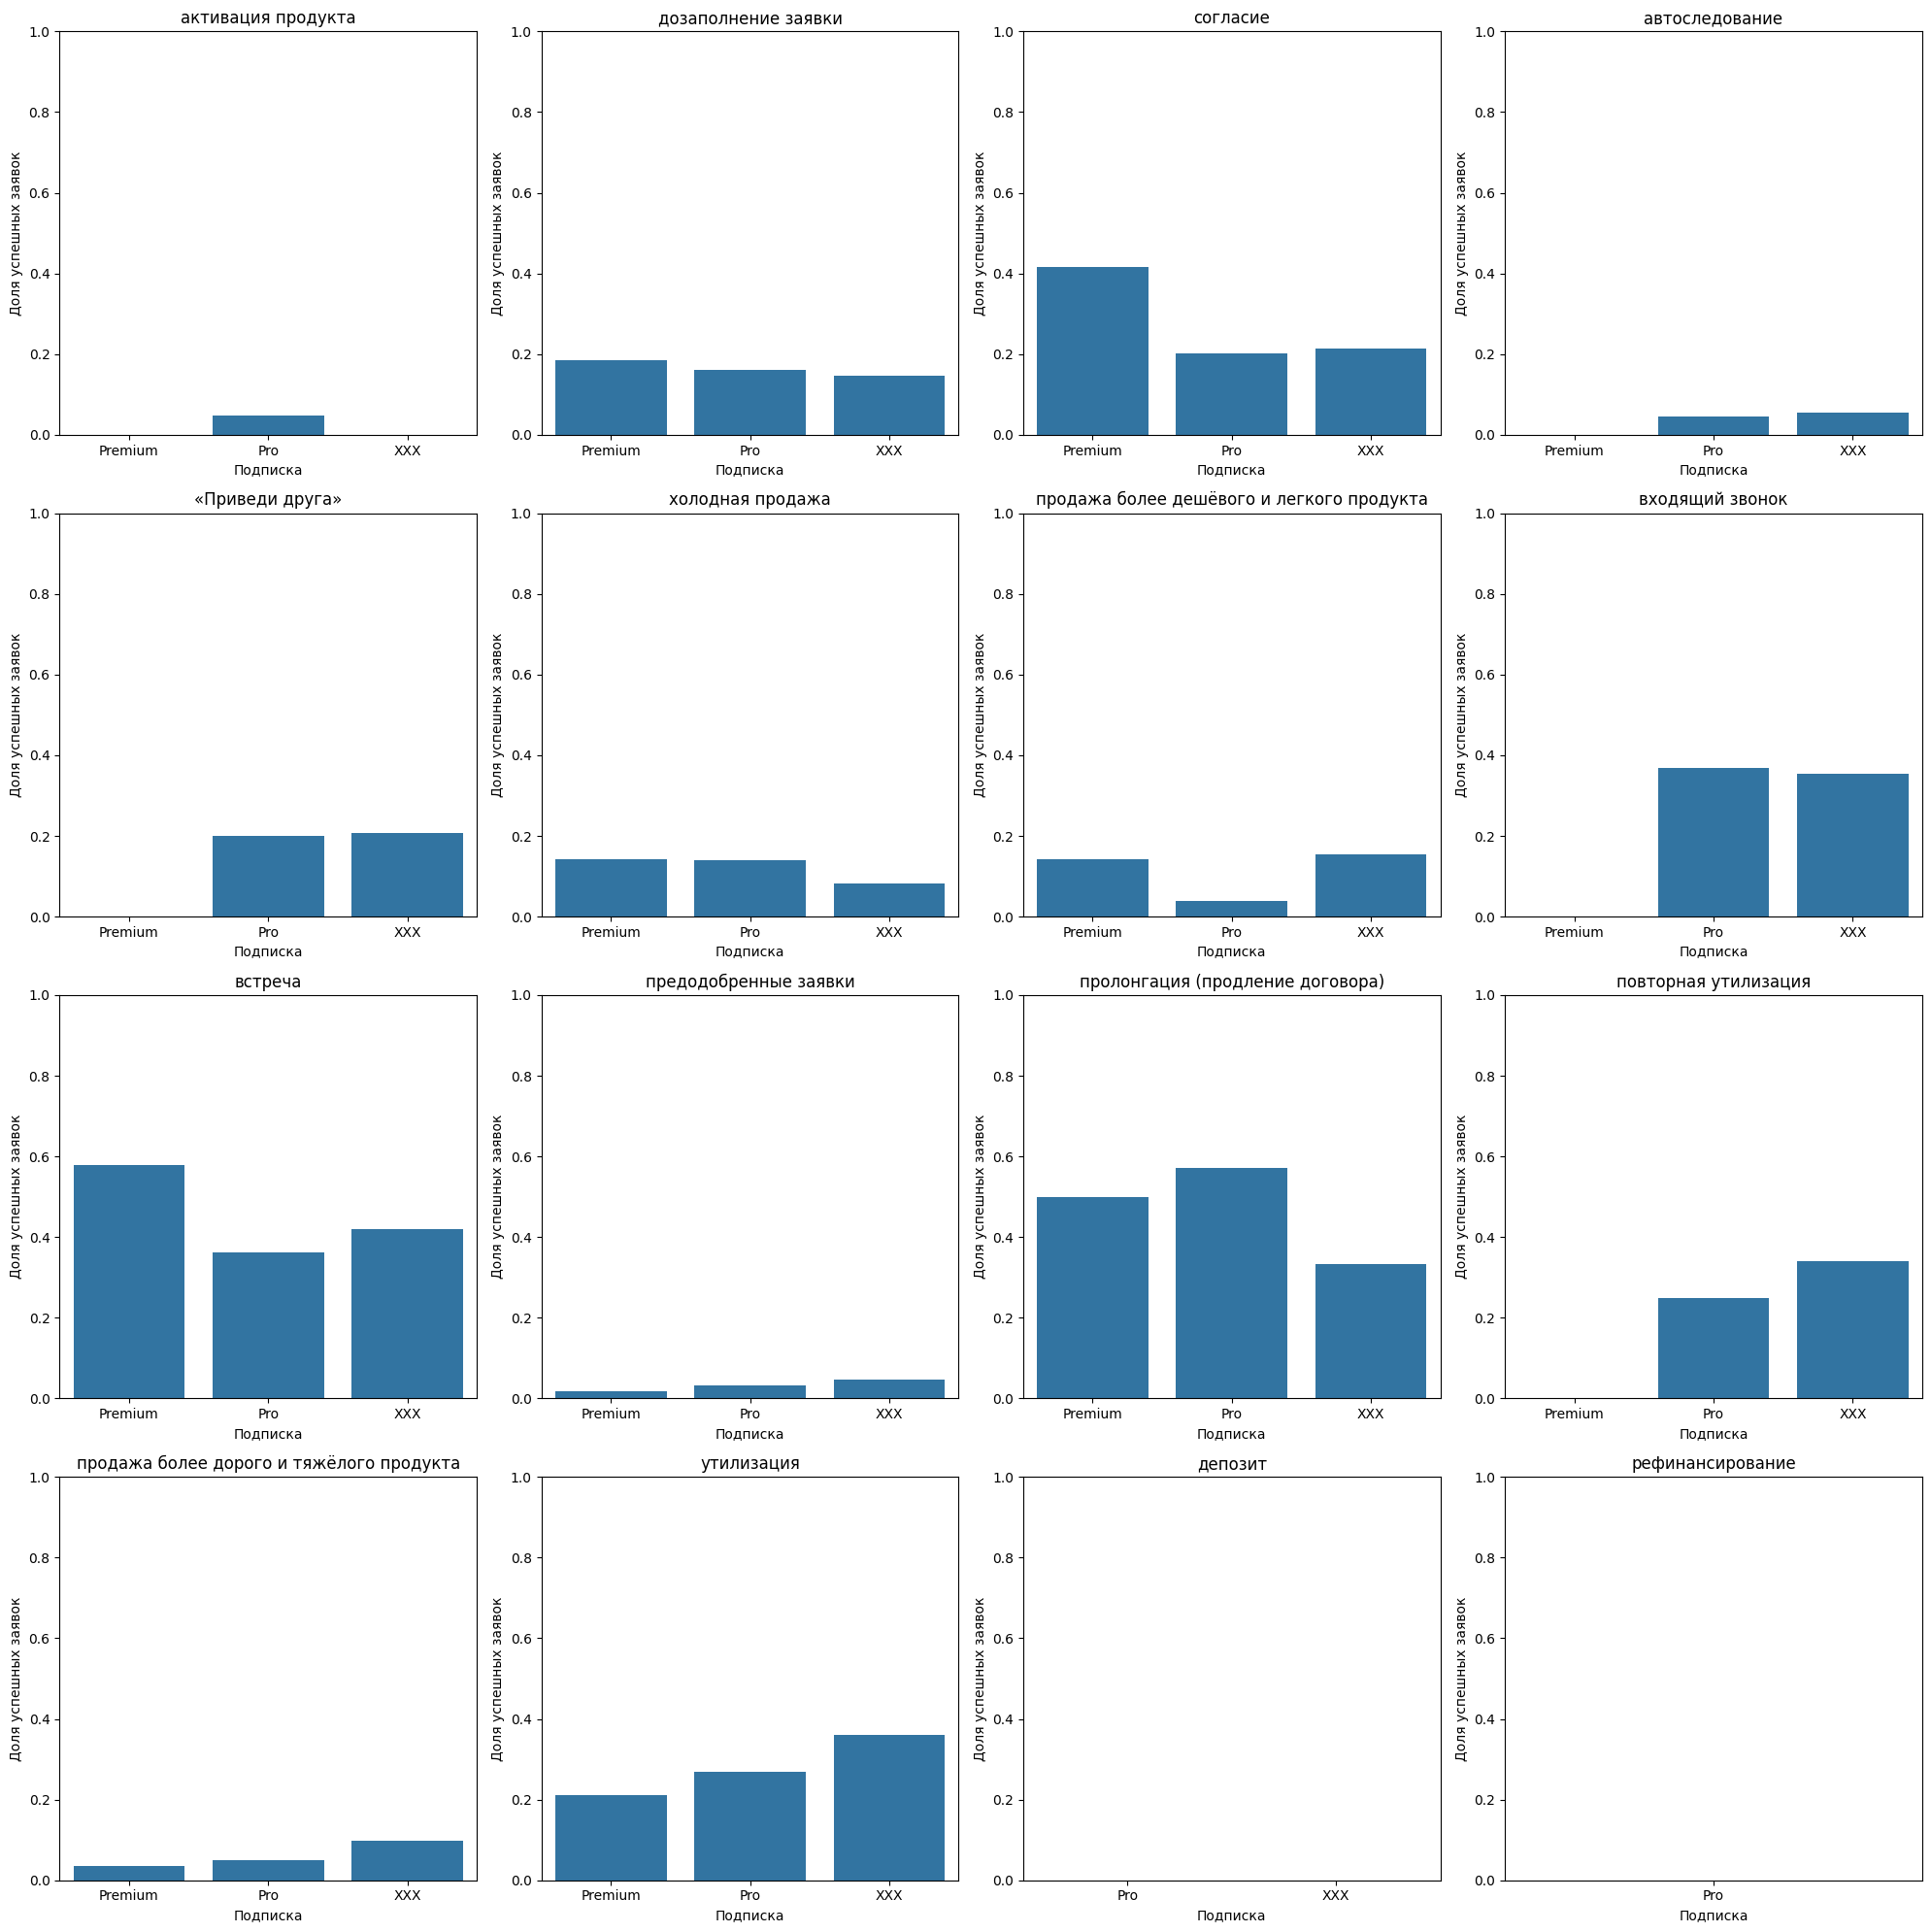

In [90]:
grouped = df.groupby(['bundle_nm', 'functional_cd']).agg(
    total=('flag_call_result', 'size'),
    approved=('flag_call_result', lambda x: (x == 1).sum())
).reset_index()

grouped['approved_ratio'] = grouped['approved'] / grouped['total']
functional_codes = grouped['functional_cd'].unique()


num_plots = len(functional_codes)
cols = 4
rows = (num_plots + cols - 1) // cols

plt.figure(figsize=(20, rows * 5))


for i, functional_code in enumerate(functional_codes):
    plt.subplot(rows, cols, i + 1)
    
    data_subset = grouped[grouped['functional_cd'] == functional_code]
    
    sns.barplot(x='bundle_nm', y='approved_ratio', data=data_subset)
    
    plt.title(translations[functional_code])
    plt.xlabel('Подписка')
    plt.ylabel('Доля успешных заявок')
    plt.ylim(0, 1) 

plt.tight_layout()
plt.show()